# Exploring Statistics Concepts Through Numerical Simulations

## May 9, 2017
## Hiro Miyake

In this Jupyter notebook, I explore some foundational concepts in statistics by comparing numerical simulations in Python with exact analytical results. The topics covered are as follows:

1. Central Limit Theorem
2. $\chi^2$ Distribution
3. $t$ Distribution
4. $F$ Distribution
5. Confidence Intervals
6. Hypothesis Testing

#### Resources
1. D. Freedman, R. Pisani, R. Purves, Statistics, Fourth Edition, W. W. Norton and Company, New York, 2007.

## 1. Central Limit Theorem

Colloqually, the central limit theorem (CLT) states that if you have a distribution with mean $\mu$ and variance $\sigma_0^2$ and you take $N$ samples from this distribution and determine the mean of those $N$ samples, and you do that $M$ times, the distribution of the mean of $N$ samples looks like a normal distribution with mean $\mu$ and variance $\sigma_0^2/N$. This is even if the underlying distribution is not a normal distribution.

More formally, if $Y = \sum_i^N X_i$, then $Y \sim N(N \mu, N \sigma^2)$, and if $Y = \sum_i^N X_i/N$, then $Y \sim N(\mu, \sigma^2/N)$.

Let's understand this first by taking the underlying distribution as a normal distribution with mean 0 and variance 1. Let's say we want to take the mean of 25 samples and do this 10000 times. The top plot is a plot of the mean, and the bottom plot is a plot of the sum.

Mean of the mean: 10.0061487656
Standard deviation of the mean: 0.79187957762


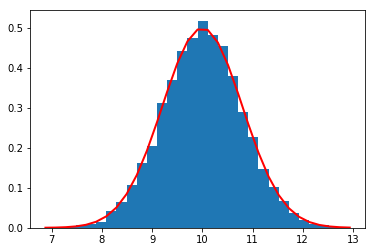

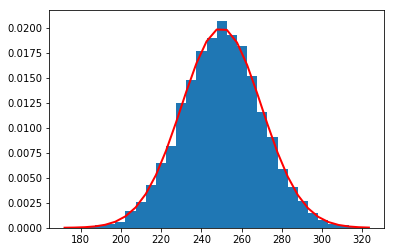

In [2]:
## Reference for working with numpy.random.normal
## https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(0)

mu, sigma = 10, 4 # mean and standard deviation
nummean = 25
sigma_clt = sigma/np.sqrt(nummean)
mean_normal = []
sum_normal = []

for i in xrange(10000):
    s = np.random.normal(mu, sigma, 25)
    mean_normal.append(np.mean(s))
    sum_normal.append(np.sum(s))
print 'Mean of the mean: {0}'.format(np.mean(mean_normal))
print 'Standard deviation of the mean: {0}'.format(np.std(mean_normal))

## This plots a histogram of the mean
count, bins, ignored = plt.hist(mean_normal, 30, normed=True)
plt.plot(bins, 1/(sigma_clt * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma_clt**2) ), linewidth=2, color='r')
plt.show()

## This plots a histogram of the sum
mu = nummean*mu
sigma_clt = np.sqrt(nummean)*sigma
count, bins, ignored = plt.hist(sum_normal, 30, normed=True)
plt.plot(bins, 1/(sigma_clt * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma_clt**2) ), linewidth=2, color='r')
plt.show()

We see that the distribution of the mean of values taken from a normal distribution is very close to the theoretically expected value of $\mu = 0$ and $\sigma^2 = \sigma_0^2/N = 1/5$ (red curve).

OK, but maybe you expect values taken from a normal distribution will end up like a normal distribution. To illustrate the generality of the CLT, let's consider now the Poisson distribution. Let's let $\lambda = 1$ for the Poisson distribution and look at the mean of 25 samples. Recall that for a Poisson distribution, the mean is $\lambda$ and the variance is also $\lambda$.

Mean of the mean: 1.000764
Standard deviation of the mean: 0.201338462058


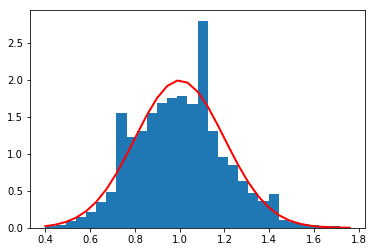

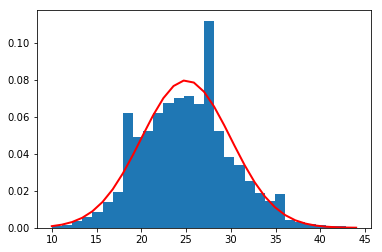

In [2]:
np.random.seed(0)
lam = 1
nummean = 25
mu, sigma = lam, np.sqrt(lam)
sigma_clt = sigma/np.sqrt(nummean)
mean_poisson = []
sum_poisson = []

for i in xrange(10000):
    s = np.random.poisson(lam, nummean)
    mean_poisson.append(np.mean(s))
    sum_poisson.append(np.sum(s))
print 'Mean of the mean: {0}'.format(np.mean(mean_poisson))
print 'Standard deviation of the mean: {0}'.format(np.std(mean_poisson))

count, bins, ignored = plt.hist(mean_poisson, 30, normed=True)
plt.plot(bins, 1/(sigma_clt * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma_clt**2) ), linewidth=2, color='r')
plt.show()

mu = nummean*mu
sigma_clt = np.sqrt(nummean)*sigma
count, bins, ignored = plt.hist(sum_poisson, 30, normed=True)
plt.plot(bins, 1/(sigma_clt * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma_clt**2) ), linewidth=2, color='r')
plt.show()

Lo and behold, the mean from a Poisson distribution also ends up looking like a normal distribution with the predicted properties.

Now let's look at the simplest distribution, the uniform distribution. To change things up a little, let's make the lower limit 0 and upper limit 10. for this distribution, the mean is 5 and the variance is $100/12$. Then the expected variance of the mean is $100/12/25 = 4/12 = 1/3$. So the standard deviation is $\sqrt{1/3} = 0.577$.

Mean of the mean: 5.00407261897
Standard deviation of the mean: 0.577339660297


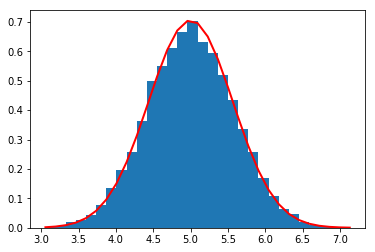

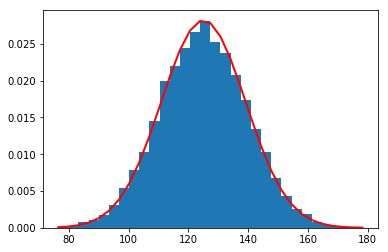

In [3]:
np.random.seed(0)
lowlim, hilim = 0, 10
nummean = 25
mu, sigma = (lowlim + hilim)/2, np.sqrt((hilim - lowlim)**2/12)
sigma_clt = sigma/np.sqrt(nummean)
mean_poisson = []
sum_poisson = []

for i in xrange(10000):
    s = np.random.uniform(low = lowlim, high = hilim, size = nummean)
    mean_poisson.append(np.mean(s))
    sum_poisson.append(np.sum(s))
print 'Mean of the mean: {0}'.format(np.mean(mean_poisson))
print 'Standard deviation of the mean: {0}'.format(np.std(mean_poisson))

count, bins, ignored = plt.hist(mean_poisson, 30, normed=True)
plt.plot(bins, 1/(sigma_clt * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma_clt**2) ), linewidth=2, color='r')
plt.show()

mu = nummean*mu
sigma_clt = np.sqrt(nummean)*sigma
count, bins, ignored = plt.hist(sum_poisson, 30, normed=True)
plt.plot(bins, 1/(sigma_clt * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma_clt**2) ), linewidth=2, color='r')
plt.show()

The central limit theorem holds very nicely for the uniform distribution.

Now let's consider a series of Bernoulli events $X_i$, i.e., you get 1 with probability $p$ and 0 with probability $1-p$. Let's assume $N$ such events in a row and consider the properties of this sum $\sum_i^N X_i$. The expectation value is given as $Np$, and the variance is $Np(1-p)$. These are exactly the parameters of the normal distribution that underlies the distribution of the sum. Alternatively the mean of the series $\sum_i^N X_i/N$ is $p$ with variance $p(1-p)/N$. Let's see how this plays out.

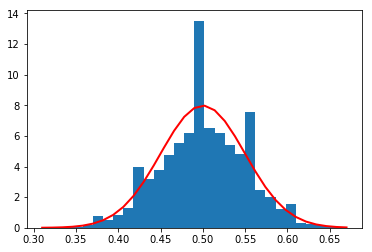

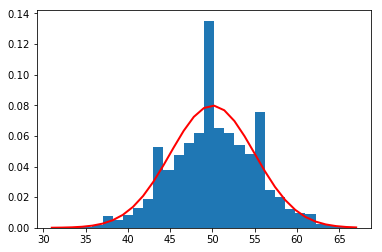

In [4]:
from __future__ import division
import random

np.random.seed(0)

n, p = 1, .5  # number of samples in a single experimental run and fraction of success
num_trial = 10000 # number of times I run the experiment (in real life, you usually get only one try)
num_throw = 100

die_avg = []
die_sum = []

for i in xrange(num_trial):
    s = np.random.binomial(n, p, num_throw)
    die_sum.append(np.sum(s))
    die_avg.append(np.mean(s))

mu = p
sigma_clt = np.sqrt(p*(1-p)/num_throw)
count, bins, ignored = plt.hist(die_avg, 30, normed=True)
plt.plot(bins, 1/(sigma_clt * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma_clt**2) ), linewidth=2, color='r')
plt.show()

mu = num_throw*p
sigma_clt = np.sqrt(num_throw*p*(1-p))
count, bins, ignored = plt.hist(die_sum, 30, normed=True)
plt.plot(bins, 1/(sigma_clt * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma_clt**2) ), linewidth=2, color='r')
plt.show()

## 2. $\chi^2$ Distribution

We will now look at the $\chi^2$ distribution. This describes the distribution of sums of squares of independent and identically distributed random normal variables. This is appropriate when you want to determine the distribution of variances, which have the form $\sum_i (x_i - \bar x)^2$.

More specifically, for known underlying distribution variance $\sigma^2$ and $n$ data points, we have that $(n - 1) s^2/\sigma^2 = \chi^2_{n-1}$ where $s^2 = \sum_i^n (x_i - \bar x)^2/(n - 1)$.

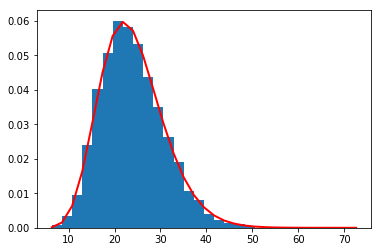

In [5]:
## https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2.html
from scipy.stats import chi2

np.random.seed(0)

mu, sigma = 0, 1 # mean and standard deviation
nummean = 25
sample_chi = []

for i in xrange(10000):
    s = np.random.normal(mu, sigma, nummean)
    trial_mean = np.mean(s)
    trial_var = np.var(s, ddof = 1)
    sample_chi.append(trial_var*(nummean - 1)/sigma**2)
    
count, bins, ignored = plt.hist(sample_chi, 30, normed=True)
plt.plot(bins, chi2.pdf(bins, nummean - 1), linewidth=2, color='r')
plt.show()

Note that you need to know the underlying distribution variance to be able to use the $\chi^2$ distribution to test whether an observed sum of squared errors is likely or not.

## 3. $t$ Distribution

Next we look at the $t$ distribution. This is a useful approach when the underlying distribution is a Gaussian. In particular, it happens to be that if $X$ is a normal distribution with mean 0 and variance 1, and $Z$ has a $\chi^2_n$ distribution, then $X/\sqrt{Z/n} = t_n$.

Note that if we are sampling from a normal distribution $X$ with mean $\mu$ and variance $\sigma^2$, then $(\bar{X} - \mu)/\sqrt{\sigma^2/n}=N(0,1)$ and $(n-1)s^2/\sigma^2 = \chi^2_{n-1}$. After some algebraic manipulations, we get $(\bar{X} - \mu)/(s/\sqrt{n}) = t_{n-1}$. The beauty of this result is that we can find a $t$ statistic for a given data set without knowing the variance of the underlying distribution.

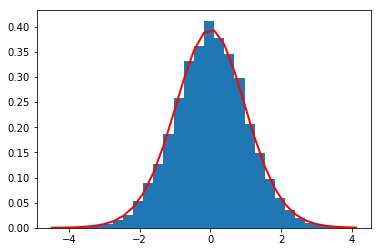

In [6]:
## https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html
from scipy.stats import t

np.random.seed(0)

mu, sigma = 0, 1 # mean and standard deviation
nummean = 25
sample_t = []

for i in xrange(10000):
    s = np.random.normal(mu, sigma, nummean)
    trial_mean = np.mean(s)
    trial_var = np.var(s, ddof = 1)
    sample_t.append(np.sqrt(nummean)*(trial_mean - mu)/np.sqrt(trial_var))

count, bins, ignored = plt.hist(sample_t, 30, normed=True)
plt.plot(bins, t.pdf(bins, nummean - 1), linewidth=2, color='r')
plt.show()

For a given data set, you can determine the t statistic and use the t distribution to determine how extreme your observed mean is compared to the mean expected from the null hypothesis.

## 4. $F$ Distribution

Here we explore the $F$ distribution. It turns out that if $X \sim \chi^2_n$ and $Z \sim \chi^2_m$, then $(X/n)/(Z/m) \sim F_{n,m}$. This is useful to test if two separate data sets came from the same underlying Gaussian distribution.

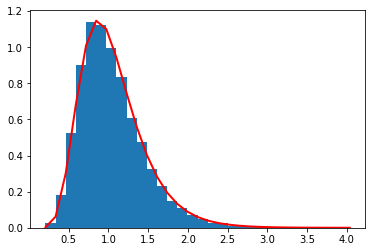

In [7]:
## https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html
from scipy.stats import f

np.random.seed(0)

mu, sigma = 0, 1 # mean and standard deviation
nummean = 25
nummean2 = 36
sample_chi = []
sample_chi2 = []
sample_f = []

for i in xrange(10000):
    s = np.random.normal(mu, sigma, nummean)
    trial_mean = np.mean(s)
    trial_var = np.var(s, ddof = 1)
    sample_chi.append(trial_var*(nummean - 1)/sigma**2)
    
    s2 = np.random.normal(mu, sigma, nummean2)
    trial_mean = np.mean(s2)
    trial_var = np.var(s2, ddof = 1)
    sample_chi2.append(trial_var*(nummean2 - 1)/sigma**2)
    
    sample_f.append(sample_chi[i]/nummean/sample_chi2[i]*nummean2)
    
count, bins, ignored = plt.hist(sample_f, 30, normed=True)
plt.plot(bins, f.pdf(bins, nummean, nummean2), linewidth=2, color='r')
plt.show()

## 5. Confidence Intervals

If you know the mean $\mu$ and variance $\sigma^2_0$ of the underlying distribution, you can determine the confidence interval for the measured mean of $n$ data points using the fact that the mean is a normal distribution with mean $\mu$ and variance $\sigma^2_0/n$. The confidence interval gives you a region centered around the mean where a certain amount of probability resides.

If you do not know the variance of the underlying distribution, you can still use the $t$ distribution to get a confidence interval.

### I. Binary Outcome of a Single Sample

Now let's do some simulations to see how this works out. Let's assume we have a population of cars with just two colors, red and blue. The true fraction of red cars is $p$ and blue cars is $1-p$. Our task is to determine the true fraction of red cars the best we can from a limited sample. So let's choose $N$ cars at random from the population. We also assume that our population is much larger than the sample size $N$, which allows us to approximate the selection process as drawing with replacement, which simplifies our analysis.

With these assumptions, analytically we know that the expected number of red cars in our sample will be $Np$ and the variance of the number of red cars is $Np(1-p)$. But let us now consider the actual situation where we make $N$ random draws and we obtain $n$ red cars. Then we can infer the true fraction $p$ to be equal to $\hat{p}=n/N$, with variance $\hat{\sigma}^2 = \hat{p}(1-\hat{p})$ for a single experimental run. For our simulation, let's assume we are able to do this sampling $M$ times. Then the average will come out to be again $n/N$, but the variance will be $\hat{p}(1-\hat{p})/N$ from the central limit theorem. What does this mean? **This means that roughly 95% of the time you run the experiment with sample size $N$, the true fraction $p$ will be within $\hat{p} \pm 2 \hat{\sigma}$.** Note the factor of 2 is correct for a large enough sample (which comes from the normal distribution). For 'small' samples, you should use the factor derived from the $t$ distribution.

In [8]:
## https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html

np.random.seed(0)
n, p = 100., .5  # number of samples in a single experimental run and fraction of red cars
ntries = 1000    # number of times I run the experiment (in real life, you usually get only one try)

s = np.random.binomial(n, p, ntries)
phat = s/n
sighat = phat*(1-phat)/n
inrange = 0
outrange = 0
for i in xrange(len(s)):
    if p > (phat[i] - 2*np.sqrt(sighat[i])) and p < (phat[i] + 2*np.sqrt(sighat[i])):
        inrange += 1
    else:
        outrange += 1
   
print 'Fraction of times the estimate is within 2 standard error: {0}'.format(float(inrange)/len(s))
print 'Fraction of times the estimate is outside 2 standard error: {0}'.format(float(outrange)/len(s))

Fraction of times the estimate is within 2 standard error: 0.934
Fraction of times the estimate is outside 2 standard error: 0.066


### II. Binary Outcome of Two Samples and Their Difference

Now let's consider the case where we have two distributions, one with fraction of red cars $p_1$ and another one with $p_2$, and choose $N_1$ from the first distribution and get $n_1$ red cars and $N_2$ from the second distribution with $n_2$ red cars. We want to estimate the difference in these two values $\Delta p = p_1 - p_2$, which we can determine to be $\Delta p = n_1/N_1 - n_2/N_2$, where $\hat{p}_1 = n_1/N_1$ and $\hat{p}_2 = n_2/N_2$. Recall that the variance of each will be $\sigma^2 = \hat{p}(1-\hat{p})/N$. Then the variance of $\Delta p$ is given by $\sigma_1^2 + \sigma_2^2$ assuming the distributions are uncorrelated. Let's see how this plays out numerically.

In [9]:
np.random.seed(0)
n, p = 100., 0.6  # number of samples in a single experimental run and fraction of red cars
n2, p2 = 400., 0.4
ntries = 1000    # number of times I run the experiment (in real life, you usually get only one try)

s = np.random.binomial(n, p, ntries)
phat = s/n
sighat = phat*(1-phat)/n
s2 = np.random.binomial(n2, p2, ntries)
phat2 = s2/n2
sighat2 = phat2*(1-phat2)/n2

pdiff = phat - phat2
sigdiff = sighat + sighat2

inrange = 0
outrange = 0
for i in xrange(len(s)):
    if (p - p2) > (pdiff[i] - 2*np.sqrt(sigdiff[i])) and (p - p2) < (pdiff[i] + 2*np.sqrt(sigdiff[i])):
        inrange += 1
    else:
        outrange += 1

print 'Fraction of times the estimate is within 2 standard error: {0}'.format(float(inrange)/len(s))
print 'Fraction of times the estimate is outside 2 standard error: {0}'.format(float(outrange)/len(s))

Fraction of times the estimate is within 2 standard error: 0.955
Fraction of times the estimate is outside 2 standard error: 0.045


### III. Continuous Outcome of a Single Sample

Now to illustrate the analogous situation with a continuous random distribution, let's consider a normal distribution with mean $\mu$ and variance $\sigma^2$. We want to estimate $\mu$ and its confidence interval by taking $N$ draws from the distribution. The mean $\mu$ is then estimated by $\hat{\mu} = \sum_i x_i/N$. The variance is estimated by $\hat{\sigma}^2 = \sum_i (x_i - \hat{\mu})^2/(N-1)$. The variance of the estimated mean is given by the CTL as $\hat{\sigma}^2/N$. In real life this data set will only be taken once, but to understand the meaning of the confidence interval for the mean, we will simulate drawing this data set $M$ times and see how many times the true mean is within 2 standard errors of the estimated mean.

In [10]:
mu, sigma = 5, 3 # mean and standard deviation
nummean = 100
ntries = 1000
mean_normal = []
var_normal = []

for i in xrange(ntries):
    s = np.random.normal(mu, sigma, nummean)
    mean_normal.append(np.mean(s))
    var_normal.append(np.var(s, ddof = 1)/nummean)

inrange = 0
outrange = 0
for i in xrange(ntries):
    if mu > (mean_normal[i] - 2*np.sqrt(var_normal[i])) and mu < ((mean_normal[i] + 2*np.sqrt(var_normal[i]))):
        inrange += 1
    else:
        outrange += 1
    
print 'Fraction of times the estimate is within 2 standard error: {0}'.format(float(inrange)/ntries)
print 'Fraction of times the estimate is outside 2 standard error: {0}'.format(float(outrange)/ntries)

Fraction of times the estimate is within 2 standard error: 0.938
Fraction of times the estimate is outside 2 standard error: 0.062


### IV. Continuous Outcome of Two Samples and Their Differences

Now let's assume we have two underlying normal distributions, and we want to estimate the difference in their means. The logic is the same as for the binary case. You estimate the means $\hat{\mu}$ and variances $\hat{\sigma}^2$ from the sample, and then you estimate the difference by taking the difference of the measured means $\hat{\mu}_1 - \hat{\mu}_2$, and the variance of the difference is given by $\hat{\sigma}_1^2/N_1 + \hat{\sigma}_2^2/N_2$.

In [11]:
mu, sigma = 5, 3 # mean and standard deviation
mu2, sigma2 = 10, 2
nummean, nummean2 = 100, 400
ntries = 1000
pdiff = []
sigdiff = []

for i in xrange(ntries):
    s = np.random.normal(mu, sigma, nummean)
    s2 = np.random.normal(mu2, sigma2, nummean2)
    pdiff.append(np.mean(s) - np.mean(s2))
    sigdiff.append(np.var(s, ddof = 1)/nummean + np.var(s2, ddof = 1)/nummean2)

inrange = 0
outrange = 0
for i in xrange(ntries):
    if (mu - mu2) > (pdiff[i] - 2*np.sqrt(sigdiff[i])) and (mu - mu2) < ((pdiff[i] + 2*np.sqrt(sigdiff[i]))):
        inrange += 1
    else:
        outrange += 1
    
print 'Fraction of times the estimate is within 2 standard error: {0}'.format(float(inrange)/ntries)
print 'Fraction of times the estimate is outside 2 standard error: {0}'.format(float(outrange)/ntries)

Fraction of times the estimate is within 2 standard error: 0.956
Fraction of times the estimate is outside 2 standard error: 0.044


Note that in this entire section I have assumed that the number of samples taken are sufficiently large that the sample mean follows the normal distribution. If the sample size is small (less than about 25), then I would use the $t$ distribution to get the appropriate confidence interval.

## 6. Hypothesis Testing

By knowing how the mean and variance of a data set relate to the $t$ distribution, you can test whether a certain hypothesis is true or not, e.g., if the mean is 0 or not 0. A closely related concept is the $p$ value.

### I. One Sample Hypothesis Testing
Let us start by considering a case where we take 10 measurements of a continuous random variable with an underlying distribution which is a normal distribution with mean $\mu = 0.1$ and $\sigma^2 = 4$. Let's assume that we happen to not know that the mean is 0.1, and we want to test whether it is possible the measured mean $\bar{\mu}$ could be $0$. This means we need to understand the distribution of the mean determined from 10 measurements with true mean 0 and standard deviation estimated by the measured value. You may recall that this is given by the $t$ distribution. From the central limit theorem, we know that for many measurements, the mean of the measurements will follow the normal distribution with measured mean $\bar{\mu}$ and variance $s^2/N$ where $N$ is the number of measurements. Now for small $N$ (which is usually about $N < 30$), the distribution of $\bar{\mu}/(s/\sqrt{N})$ follows the $t$ distribution. We see this nicely in the simulation below.

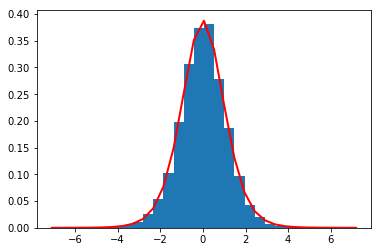

In [12]:
## https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html
from scipy.stats import t

np.random.seed(0)

mu, sigma = 0, 2 # mean and standard deviation
nummean = 10
sample_t = []

for i in xrange(10000):
    s = np.random.normal(mu, sigma, nummean)
    trial_mean = np.mean(s)
    trial_var = np.var(s, ddof = 1)
    sample_t.append(np.sqrt(nummean)*(trial_mean - mu)/np.sqrt(trial_var))

count, bins, ignored = plt.hist(sample_t, 30, normed=True)
plt.plot(bins, t.pdf(bins, nummean - 1), linewidth=2, color='r')
plt.show()

Now let's look at the actual result of 10 measurements from a normal distribution with mean $\mu = 0.1$ and $\sigma^2 = 4$.

In [13]:
np.random.seed(0)
mu, sigma = 0.1, 2 # mean and standard deviation
nummean = 10
s = np.random.normal(mu, sigma, nummean)
print np.mean(s)
print np.var(s, ddof = 1)

1.57604634146
4.15663200222


The question we can ask is, **IF** we assume the null hypothesis that the mean of the underlying distribution is 0, what is the probability that the measured mean will be larger than 1.576? Naively, given the unbiased variance of 4.16, it seems not impossible that the underlying distribution has mean 0. In this case, we can use the $t$ statistic to determine the significance of this deviation from 0. The $t$ statistic is given by $\bar{\mu}/(s/\sqrt{N})$. The $p$ value then is given by the area under the curve in the $t$ distribution, above the $t$ statistic.

In [14]:
tstat = np.mean(s)/(np.sqrt(np.var(s, ddof = 1))/np.sqrt(10))
print tstat
print 1 - t.cdf(tstat, nummean - 1)

2.44454589149
0.0185435264066


We can then say that the $p$ value is 0.019. This indicates that it is likely the underlying distribution mean is not 0, since this is less than the 5% level typically used as a benchmark to reject the null hypothesis.

### II. Two Sample Hypothesis Testing
Now assume we have two different samples, 10 samples each, both taken from an underlying distribution with mean $\mu = 0.1$ and $\sigma^2 = 4$. Let's figure out what the degrees of freedom should be for the t statistic.

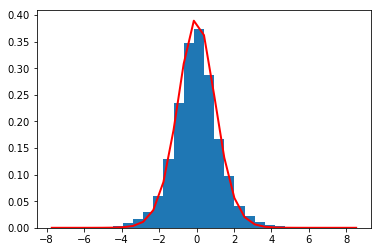

In [8]:
from scipy.stats import t

np.random.seed(0)

mu, sigma = 0, 4 # mean and standard deviation
mu2, sigma2 = 3, 9
nummean = 15
nummean2 = 5
sample_t = []

for i in xrange(10000):
    s = np.random.normal(mu, sigma, nummean)
    trial_mean = np.mean(s)
    trial_var = np.var(s, ddof = 1)
    
    s2 = np.random.normal(mu2, sigma2, nummean2)
    trial_mean2 = np.mean(s2)
    trial_var2 = np.var(s2, ddof = 1)
    
    mean_diff = trial_mean - trial_mean2
    var_diff = trial_var/nummean + trial_var2/nummean2
    
    sample_t.append((mean_diff - (mu - mu2))/np.sqrt(var_diff))

count, bins, ignored = plt.hist(sample_t, 30, normed=True)
plt.plot(bins, t.pdf(bins, nummean + nummean2 - 1), linewidth=2, color='r')
plt.show()

Note that the for t distribution, the degrees of freedom is the sum of the samples from both samples minus 1.

### I. $\chi^2$ Test

If your outcome is discrete and more than two levels, then a $\chi^2$ test can tell you how likely the observed outcome is if an underlying probability for each level is assumed. For this test to work well, none of the levels should be too rare in the data.

To make this concrete, we can assume that we have a die with 6 sides. If the die is fair, then we expect each side to come up 1/6 of the time. To test whether the die is loaded or not, we throw the die 60 times, and let's say we get for each side a frequency $(1,2,3,4,5,6)=(4,6,17,16,8,9)$ (set up taken from Ref[1]). In this case we expect each side to come up 10 times. Then the $\chi^2$ is determined as follows.

In [15]:
chi2data = (4-10)**2/10.+(6-10)**2/10.+(17-10)**2/10.+(16-10)**2/10.+(8-10)**2/10.+(9-10)**2/10.
print chi2data

14.2


The question then is, is 14.2 too large or about right for a fair die? For this, we can look at the $\chi^2$ distribution. But first let's try to understand the fact that the variable defined above as $\chi^2$ indeed follows this distribution.

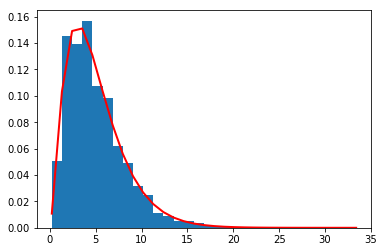

In [16]:
from __future__ import division
from scipy.stats import chi2
import random

random.seed(1)
num_trial = 10000
num_throw = 60
num_class = 6
die_face = []
die_freq_zero = []
for i in xrange(num_class):
    die_face.append(i + 1)
    die_freq_zero.append(0)

die_chi2 = []
for i in xrange(num_trial):
    die_freq = list(die_freq_zero)
    for j in xrange(num_throw):
        die_freq[random.choice(die_face) - 1] += 1
    chi2val = 0
    for j in xrange(num_class):
        chi2val += (die_freq[j] - num_throw/num_class)**2/(num_throw/num_class)
    die_chi2.append(chi2val)

count, bins, ignored = plt.hist(die_chi2, 30, normed=True)
plt.plot(bins, chi2.pdf(bins, num_class - 1), linewidth=2, color='r')
plt.show()

What we then want to know is, what is the probability to get $\chi^2 > 14.2$? This is given as follows:

In [17]:
print 1 - chi2.cdf(chi2data, num_class - 1)

0.0143876781769


The probability that we would get a $\chi^2$ of 14.2 is 1.4%, so it is unlikely that the die is fair.